In [1]:
import pandas as pd

dataset = pd.read_csv("cancer.csv")
x = dataset.iloc[:, 2:29].values
y = dataset.iloc[:,1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)

In [7]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are already defined and contain your training and testing features

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training features
x_train = scaler.fit_transform(x_train)

# Transform the testing features using the same scaler fitted on the training data
x_test = scaler.transform(x_test)


PCA(n_components=1) creates an instance of PCA with the number of principal components set to 1.

pca.fit_transform(x_train) fits the PCA model on the scaled training data (x_train) and transforms it into 1 principal component. The transformed data is stored in the variable x_train_scaled.

print(x_train_scaled[:10]) prints the transformed data for the first 10 samples. Note that the transformed data will have only 1 column since you specified n_components=1.

PCA is a dimensionality reduction technique that projects the original features into a new coordinate system, capturing the most significant patterns in the data. By specifying n_components=1, you are reducing the data to a single feature while retaining the most important information about the original features.

In [8]:
from sklearn.decomposition import PCA

# Assuming x_train is already defined and contains your scaled training features
# Initialize PCA with 1 principal component
pca = PCA(n_components=1)

# Fit and transform the scaled training features using PCA
x_train_scaled = pca.fit_transform(x_train)

# Print the transformed data for the first 10 samples
print(x_train_scaled[:10])


[[-4.3064883 ]
 [ 8.1134022 ]
 [-2.38454209]
 [-4.10920199]
 [ 4.87043886]
 [-0.56209382]
 [ 4.11466008]
 [-2.83206691]
 [ 2.84532207]
 [-2.29905955]]


plt.scatter(x_train_scaled, y_train) creates a scatter plot where the x-axis represents the transformed principal component(s) (in this case, just one component), and the y-axis represents the target variable (y_train).

plt.xlabel('Principal Component 1') sets the label for the x-axis.

plt.ylabel('Target Variable') sets the label for the y-axis.

plt.show() displays the scatter plot.

This code will visualize the relationship between the transformed principal component(s) and the target variable. Scatter plots are useful for understanding the distribution and relationships between variables in your data.

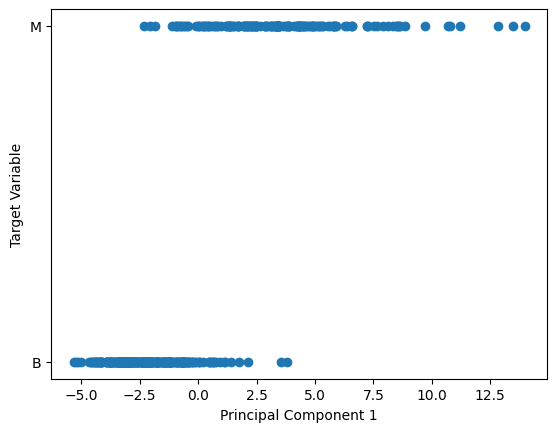

In [9]:
import matplotlib.pyplot as plt

# Assuming x_train_scaled and y_train are already defined
plt.scatter(x_train_scaled, y_train)

# Set the labels for the x and y axes
plt.xlabel('Principal Component 1')
plt.ylabel('Target Variable')

# Display the scatter plot
plt.show()


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming x_train and y_train are already defined and contain your training features and target variable

# Create a Gradient Boosting Classifier object
gradientboost = GradientBoostingClassifier()

# Fit the model to the training data
gradientboost.fit(x_train, y_train)


GradientBoostingClassifier()

In [ ]:
y_preds = gradientboost.predict(x_test)

# Calculate and print the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[69  4]
 [ 2 39]]


LabelEncoder() creates an instance of the LabelEncoder class.

label_encoder.fit_transform(y_train) fits the label encoder on the training target variable y_train and transforms it into numerical values. The transformed values are stored in the variable y_train_encoded.

XGBClassifier() creates an instance of the XGBoost classifier.

xgboost_classifier.fit(x_train, y_train_encoded) fits the XGBoost classifier to the training data with numerical target classes.

This approach is suitable when dealing with categorical target variables in a classification problem. The Label Encoding step is necessary because most machine learning algorithms, including XGBoost, work with numerical values as target variables. Converting categorical labels into numerical values allows you to use these algorithms effectively.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert string classes to numerical values using Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create an XGBoost classifier
xgboost_classifier = XGBClassifier()

# Fit the classifier to the training data with numerical target classes
xgboost_classifier.fit(x_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Convert numerical predictions to string labels
y_preds_strings = label_encoder.inverse_transform(y_preds)

# Print the confusion matrix
print(confusion_matrix(y_test, y_preds_strings))



[[71  2]
 [ 2 39]]
